The goal of this project is to analyze the number of Covid-19 cases, hospitalizations and deaths for the state of connecticut. The data spans from March 2020 to Apr 2021.

We will attemp to answer a few questions here:

1. In which month did the most cases and deaths occured?
2. What percentage of people died compared the number of confirmed cases?
3. What percentage of people were hospitalized?
4. Which age groups were most vulnerable to the virus? 
5. Which age group is most likely to die from covid-19? Are we doing any better this year than the last year?
6. What is the positivity rate for covid-19 test?




In [187]:
import pandas as pd
import numpy as np

import os
os.path.isfile('/Users/Diwan/COVID-19.csv')


True

In [188]:
# taking a first look at our raw data
covid_19 = pd.read_csv("COVID-19.csv", low_memory=False)
covid_19.head()

,Date,State,COVID-19 tests reported,Total cases,Confirmed cases,Probable cases,Hospitalized cases,Total deaths,Confirmed deaths,Probable deaths,cases_age0_9,cases_age10_19,cases_age20_29,cases_age30_39,cases_age40_49,cases_age50_59,cases_age60_69,cases_age70_79,cases_age80_Older
0,10/15/2020,CONNECTICUT,1965112.0,62830,60309.0,2521.0,184,4542,3641.0,901.0,1478,3739,9485,9292,8681,9961,7749,5004,7411
1,10/18/2020,CONNECTICUT,2037017.0,64021,61441.0,2580.0,195,4554,3652.0,902.0,1537,3895,9752,9492,8830,10129,7856,5049,7451
2,10/19/2020,CONNECTICUT,2051670.0,64455,61863.0,2592.0,217,4559,3658.0,901.0,1559,3935,9835,9557,8893,10194,7906,5076,7470
3,10/20/2020,CONNECTICUT,2067516.0,64871,62261.0,2610.0,213,4567,3666.0,901.0,1582,3977,9920,9642,8959,10246,7936,5092,7487
4,10/21/2020,CONNECTICUT,2089633.0,65373,62743.0,2630.0,232,4569,3667.0,902.0,1605,4043,10035,9722,9024,10317,7984,5112,7506


In [189]:
#replacing missing values with the mean

covid_19 = covid_19.fillna(covid_19.mean())
covid_19.head()



,Date,State,COVID-19 tests reported,Total cases,Confirmed cases,Probable cases,Hospitalized cases,Total deaths,Confirmed deaths,Probable deaths,cases_age0_9,cases_age10_19,cases_age20_29,cases_age30_39,cases_age40_49,cases_age50_59,cases_age60_69,cases_age70_79,cases_age80_Older
0,10/15/2020,CONNECTICUT,1965112.0,62830,60309.0,2521.0,184,4542,3641.0,901.0,1478,3739,9485,9292,8681,9961,7749,5004,7411
1,10/18/2020,CONNECTICUT,2037017.0,64021,61441.0,2580.0,195,4554,3652.0,902.0,1537,3895,9752,9492,8830,10129,7856,5049,7451
2,10/19/2020,CONNECTICUT,2051670.0,64455,61863.0,2592.0,217,4559,3658.0,901.0,1559,3935,9835,9557,8893,10194,7906,5076,7470
3,10/20/2020,CONNECTICUT,2067516.0,64871,62261.0,2610.0,213,4567,3666.0,901.0,1582,3977,9920,9642,8959,10246,7936,5092,7487
4,10/21/2020,CONNECTICUT,2089633.0,65373,62743.0,2630.0,232,4569,3667.0,902.0,1605,4043,10035,9722,9024,10317,7984,5112,7506


We can also drop the State column since the entire dataset belongs to Connecticut.

In [190]:
covid_19 = covid_19.drop('State', 1)
covid_19.head()

,Date,COVID-19 tests reported,Total cases,Confirmed cases,Probable cases,Hospitalized cases,Total deaths,Confirmed deaths,Probable deaths,cases_age0_9,cases_age10_19,cases_age20_29,cases_age30_39,cases_age40_49,cases_age50_59,cases_age60_69,cases_age70_79,cases_age80_Older
0,10/15/2020,1965112.0,62830,60309.0,2521.0,184,4542,3641.0,901.0,1478,3739,9485,9292,8681,9961,7749,5004,7411
1,10/18/2020,2037017.0,64021,61441.0,2580.0,195,4554,3652.0,902.0,1537,3895,9752,9492,8830,10129,7856,5049,7451
2,10/19/2020,2051670.0,64455,61863.0,2592.0,217,4559,3658.0,901.0,1559,3935,9835,9557,8893,10194,7906,5076,7470
3,10/20/2020,2067516.0,64871,62261.0,2610.0,213,4567,3666.0,901.0,1582,3977,9920,9642,8959,10246,7936,5092,7487
4,10/21/2020,2089633.0,65373,62743.0,2630.0,232,4569,3667.0,902.0,1605,4043,10035,9722,9024,10317,7984,5112,7506


In [191]:
# extracting the month and year from date and assigning these to a new column.
covid_19['month'] = pd.DatetimeIndex(covid_19['Date']).month
covid_19['year'] = pd.DatetimeIndex(covid_19['Date']).year
covid_19['MY'] = pd.to_datetime(covid_19['Date']).dt.to_period('M')
covid_19


,Date,COVID-19 tests reported,Total cases,Confirmed cases,Probable cases,Hospitalized cases,Total deaths,Confirmed deaths,Probable deaths,cases_age0_9,...,cases_age20_29,cases_age30_39,cases_age40_49,cases_age50_59,cases_age60_69,cases_age70_79,cases_age80_Older,month,year,MY
0,10/15/2020,1965112.0,62830,60309.0,2521.0,184,4542,3641.0,901.0,1478,...,9485,9292,8681,9961,7749,5004,7411,10,2020,2020-10
1,10/18/2020,2037017.0,64021,61441.0,2580.0,195,4554,3652.0,902.0,1537,...,9752,9492,8830,10129,7856,5049,7451,10,2020,2020-10
2,10/19/2020,2051670.0,64455,61863.0,2592.0,217,4559,3658.0,901.0,1559,...,9835,9557,8893,10194,7906,5076,7470,10,2020,2020-10
3,10/20/2020,2067516.0,64871,62261.0,2610.0,213,4567,3666.0,901.0,1582,...,9920,9642,8959,10246,7936,5092,7487,10,2020,2020-10
4,10/21/2020,2089633.0,65373,62743.0,2630.0,232,4569,3667.0,902.0,1605,...,10035,9722,9024,10317,7984,5112,7506,10,2020,2020-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,04/11/2021,8101073.0,324571,298941.0,25630.0,524,7957,6542.0,1415.0,18891,...,56230,50168,45542,49338,33112,17098,16246,4,2021,2021-04
299,04/12/2021,8130743.0,325689,299908.0,25781.0,545,7974,6558.0,1416.0,18958,...,56491,50381,45699,49506,33194,17106,16258,4,2021,2021-04
300,04/13/2021,8167245.0,327298,301324.0,25974.0,518,7984,6568.0,1416.0,19091,...,56791,50635,45905,49709,33273,17142,16279,4,2021,2021-04
301,04/14/2021,8201633.0,328000,301921.0,26079.0,505,7990,6574.0,1416.0,19165,...,56961,50753,46005,49809,33328,17164,16293,4,2021,2021-04


In [193]:
# mapping the MY column to alphanumeric names of month and year.
# for some reason this didn't work, I will have to change date to string type I believe, so I will come back to it later
Month_year = {"2020-03": "Mar 2020", "2020-04": "Apr 2020", "2020-05" : "May 2020", "2020-06":"Jun 2020", "2020-07": "Jul 2020", "2020-08": "Aug 2020", "2020-09": "Sep 2020", "2020-10":"Oct 2020", "2020-11": "Nov 2020", "2020-12":"Dec 2020", "2021-01": "Jan 2021", "2021-02": "Feb 2021", "2021-03": "Mar 2021", "2021-04":"Apr 2021"}
covid_19["Month_year"] = covid_19["MY"].map(Month_year)
covid_19.head()

,Date,COVID-19 tests reported,Total cases,Confirmed cases,Probable cases,Hospitalized cases,Total deaths,Confirmed deaths,Probable deaths,cases_age0_9,...,cases_age40_49,cases_age50_59,cases_age60_69,cases_age70_79,cases_age80_Older,month,year,MY,rank,Month_year
0,10/15/2020,1965112.0,62830,60309.0,2521.0,184,4542,3641.0,901.0,1478,...,8681,9961,7749,5004,7411,10,2020,2020-10,NaN,NaN
1,10/18/2020,2037017.0,64021,61441.0,2580.0,195,4554,3652.0,902.0,1537,...,8830,10129,7856,5049,7451,10,2020,2020-10,NaN,NaN
2,10/19/2020,2051670.0,64455,61863.0,2592.0,217,4559,3658.0,901.0,1559,...,8893,10194,7906,5076,7470,10,2020,2020-10,NaN,NaN
3,10/20/2020,2067516.0,64871,62261.0,2610.0,213,4567,3666.0,901.0,1582,...,8959,10246,7936,5092,7487,10,2020,2020-10,NaN,NaN
4,10/21/2020,2089633.0,65373,62743.0,2630.0,232,4569,3667.0,902.0,1605,...,9024,10317,7984,5112,7506,10,2020,2020-10,NaN,NaN


In [204]:
# grouping by month tells us the total number of cases, deaths and hospitalizations for each month
covid_month = covid_19.groupby('MY').sum()
covid_month


,COVID-19 tests reported,Total cases,Confirmed cases,Probable cases,Hospitalized cases,Total deaths,Confirmed deaths,Probable deaths,cases_age0_9,cases_age10_19,cases_age20_29,cases_age30_39,cases_age40_49,cases_age50_59,cases_age60_69,cases_age70_79,cases_age80_Older,month,year
MY,,,,,,,,,,,,,,,,,,,
2020-03,1.531175e+07,13020,1.022246e+06,67324.357447,2017,251,35568.510638,8388.425532,136,279,1646,1992,2105,2735,2015,1153,953,24,16160
2020-04,1.580632e+06,467203,3.833422e+06,252466.340426,48126,29750,133381.914894,31456.595745,3490,9355,49610,66200,72829,88825,73588,43470,54976,120,60600
2020-05,5.358624e+06,1137649,3.874092e+06,254539.340426,30921,102548,136492.914894,32315.595745,11263,26442,125600,158221,162980,199896,168914,111477,168693,155,62620
2020-06,1.084998e+07,1352489,1.293182e+06,59307.000000,6438,125758,100238.000000,25520.000000,18106,37572,158456,190872,190494,229698,191600,128517,203433,180,60600
2020-07,1.390356e+07,1055757,1.012175e+06,43582.000000,1565,96454,77167.000000,19287.000000,15508,33722,131439,150126,148276,177251,146258,98027,153911,154,44440
2020-08,2.166842e+07,1128386,1.083722e+06,44664.000000,1253,97964,78513.000000,19451.000000,18710,44471,147769,163023,158390,187158,151679,100449,155672,176,44440
2020-09,2.964080e+07,1163085,1.114982e+06,48103.000000,1492,94261,75522.000000,18739.000000,22353,56780,162946,169668,161809,189542,150362,98580,150472,189,42420
2020-10,4.163099e+07,1337889,1.282440e+06,55449.000000,4269,95653,76719.000000,18934.000000,32192,80539,202858,198531,184691,212001,164522,105880,156093,210,42420
2020-11,5.835418e+07,1960944,1.833003e+06,127941.000000,14820,100464,80741.000000,19723.000000,67123,157421,330693,303106,271066,300842,219322,133668,176917,231,42420


Answer 1:

By sorting the values by the number of confirmed deaths, we can see that the highest number of deaths occurred in May 2020, followed by a decrease in June and July, and relatively remained stable until rising again near the end of the year in the months of November and December and continuing into 2021. 

The highest number of confirmed cases were reported in Feb 2021.

The hihghest number of people were hospitalized in May 2020.

Text(0, 0.5, '')

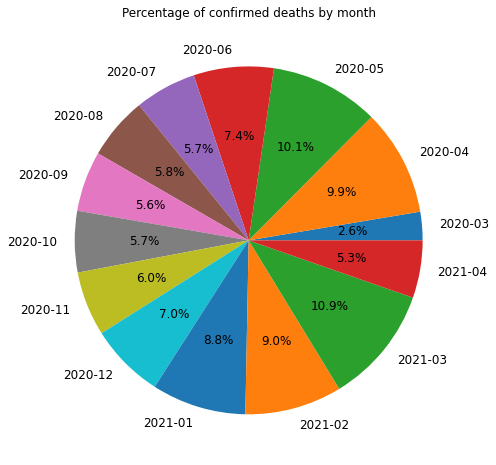

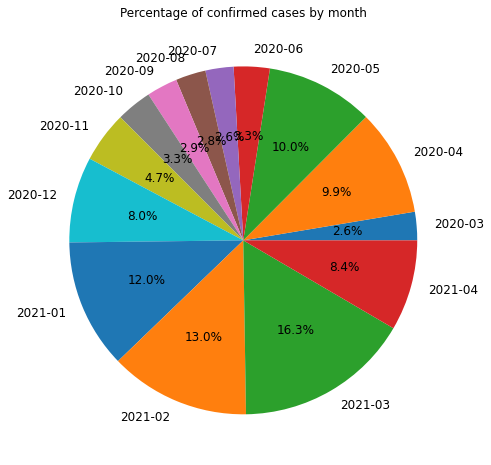

In [205]:
covid_month.plot.pie(title="Percentage of confirmed deaths by month",y='Confirmed deaths', autopct='%1.1f%%', fontsize=12, figsize=(10, 8), legend = False)
plt.ylabel(None)
covid_month.plot.pie(title="Percentage of confirmed cases by month",y='Confirmed cases', autopct='%1.1f%%', fontsize=12, figsize=(10, 8), legend = False)
plt.ylabel(None)



We can see from the pie chart the the highest percentage of people dies in May 2020. Even though the number of cases increased significantly in 2021, the percentage of deaths is still lower than the 2020 months that had the most cases.  

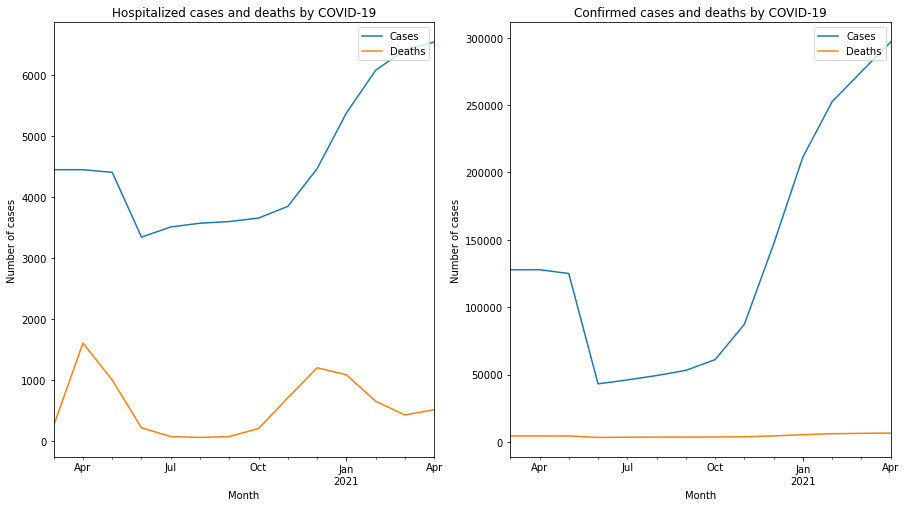

In [216]:
#grouping by the month and plotting the number of confirmed cases, hopitalizations and confirmed deaths for each month.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
covid_19_mean = covid_19.groupby('MY').mean()
covid_19_mean['Confirmed deaths'].plot.line()
covid_19_mean['Hospitalized cases'].plot.line()
plt.legend(["Cases", "Deaths"], loc ="upper right")
plt.xticks()

plt.title('Hospitalized cases and deaths by COVID-19')
plt.ylabel('Number of cases')
plt.xlabel('Month')

plt.subplot(1, 2, 2)
covid_19_mean = covid_19.groupby('MY').mean()
covid_19_mean['Confirmed cases'].plot.line()
covid_19_mean['Confirmed deaths'].plot.line()
plt.legend(["Cases", "Deaths"], loc ="upper right")
plt.xticks()

plt.title('Confirmed cases and deaths by COVID-19')
plt.ylabel('Number of cases')
plt.xlabel('Month')

plt.show()


We can see from the charts that the number of hospitalized and confirmed cases have drastically increased in the year 2021. 
Another interesting thing to note is that even that around Dec 2020, even though the hospitalized cases continued to increase, the number of deaths have decreased. This could be attributed to the administration of vaccines. Since majority of the population that was hositalized included elderly and vulnerable population, and as these were the first ones to recieve the vaccine, we can safely assume that hospitalization rate decreased after administration of vaccines. 

This can also be seen as a measure of effectiveness for the vaccinations. 

Another interesting thing to note is that even though the cases have been increasing since last summer, the number of deaths have remained steadily the same. 

In [208]:
#calculating the percentage of people that died and percentage that got hospitalized and adding these as a new column
covid_month['% Deaths'] = covid_month['Confirmed deaths']/covid_month['Confirmed cases']*100
covid_month['% Hospitalized'] = covid_month['Hospitalized cases']/covid_month['Confirmed cases']*100
covid_month


,COVID-19 tests reported,Total cases,Confirmed cases,Probable cases,Hospitalized cases,Total deaths,Confirmed deaths,Probable deaths,cases_age0_9,cases_age10_19,...,cases_age30_39,cases_age40_49,cases_age50_59,cases_age60_69,cases_age70_79,cases_age80_Older,month,year,% Deaths,% Hospitalized
MY,,,,,,,,,,,,,,,,,,,,,
2020-03,1.531175e+07,13020,1.022246e+06,67324.357447,2017,251,35568.510638,8388.425532,136,279,...,1992,2105,2735,2015,1153,953,24,16160,3.479448,0.197311
2020-04,1.580632e+06,467203,3.833422e+06,252466.340426,48126,29750,133381.914894,31456.595745,3490,9355,...,66200,72829,88825,73588,43470,54976,120,60600,3.479448,1.255432
2020-05,5.358624e+06,1137649,3.874092e+06,254539.340426,30921,102548,136492.914894,32315.595745,11263,26442,...,158221,162980,199896,168914,111477,168693,155,62620,3.523223,0.798148
2020-06,1.084998e+07,1352489,1.293182e+06,59307.000000,6438,125758,100238.000000,25520.000000,18106,37572,...,190872,190494,229698,191600,128517,203433,180,60600,7.751268,0.497842
2020-07,1.390356e+07,1055757,1.012175e+06,43582.000000,1565,96454,77167.000000,19287.000000,15508,33722,...,150126,148276,177251,146258,98027,153911,154,44440,7.623879,0.154618
2020-08,2.166842e+07,1128386,1.083722e+06,44664.000000,1253,97964,78513.000000,19451.000000,18710,44471,...,163023,158390,187158,151679,100449,155672,176,44440,7.244755,0.115620
2020-09,2.964080e+07,1163085,1.114982e+06,48103.000000,1492,94261,75522.000000,18739.000000,22353,56780,...,169668,161809,189542,150362,98580,150472,189,42420,6.773383,0.133814
2020-10,4.163099e+07,1337889,1.282440e+06,55449.000000,4269,95653,76719.000000,18934.000000,32192,80539,...,198531,184691,212001,164522,105880,156093,210,42420,5.982268,0.332881
2020-11,5.835418e+07,1960944,1.833003e+06,127941.000000,14820,100464,80741.000000,19723.000000,67123,157421,...,303106,271066,300842,219322,133668,176917,231,42420,4.404848,0.808509


Answer 2 and 3: 

We can see that the percentage of people that were hospitalized for the state of Connecticut was not too high. This means that from the confirmed cases, a lot if the people were able to recover on their own. This could also mean that percentage population of Connecticut might include more younger adults.

The precentage of deaths was less than 10%. 

In [209]:
# for the ease of our analysis, we are dividing our population into 3 different age groups and adding these as a new column to the data frame
covid_month['under 20 years'] = covid_month['cases_age0_9'] +  covid_month['cases_age10_19']
covid_month['20 years - 50 years'] = covid_month['cases_age20_29'] + covid_month['cases_age30_39'] + covid_month['cases_age40_49']
covid_month['over 50 years'] = covid_month['cases_age50_59'] + covid_month['cases_age60_69'] + covid_month['cases_age70_79'] + covid_month['cases_age80_Older']



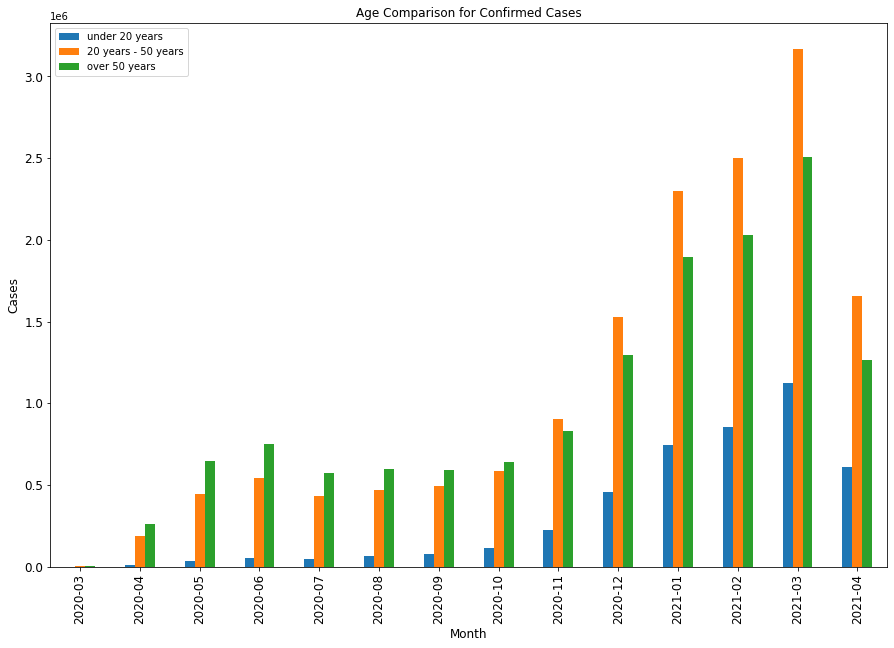

In [210]:
# Comparing age groups for number of confirmed cases

import matplotlib.pyplot as plt
ax = covid_month[['under 20 years','20 years - 50 years', 'over 50 years']].plot(kind='bar', title ="Age Comparison for Confirmed Cases", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Cases", fontsize=12)
plt.show()



Answer 4:

We can see from the graph that initially from May 2020 to Oct 2020, the most vulnerable age group for the state of Connecticut was over 50 years. What is interesting is that after that the cases started rising more among the 20 years to 50 years age group. The cases continued to drastcially increase in 2021. The population under 20 years remained the least likely to get infected with the virus throughout the time period. 



In [211]:
# we can add the total number of cases, hospitalizations and deaths and add it to the end of the column
sums = covid_month.select_dtypes(pd.np.number).sum().rename('Total')
covid_month.append(sums)


<ipython-input-211-657e5c587944>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  sums = covid_month.select_dtypes(pd.np.number).sum().rename('Total')


,COVID-19 tests reported,Total cases,Confirmed cases,Probable cases,Hospitalized cases,Total deaths,Confirmed deaths,Probable deaths,cases_age0_9,cases_age10_19,...,cases_age60_69,cases_age70_79,cases_age80_Older,month,year,% Deaths,% Hospitalized,under 20 years,20 years - 50 years,over 50 years
MY,,,,,,,,,,,,,,,,,,,,,
2020-03,1.531175e+07,13020.0,1.022246e+06,6.732436e+04,2017.0,251.0,3.556851e+04,8388.425532,136.0,279.0,...,2015.0,1153.0,953.0,24.0,16160.0,3.479448,0.197311,415.0,5743.0,6856.0
2020-04,1.580632e+06,467203.0,3.833422e+06,2.524663e+05,48126.0,29750.0,1.333819e+05,31456.595745,3490.0,9355.0,...,73588.0,43470.0,54976.0,120.0,60600.0,3.479448,1.255432,12845.0,188639.0,260859.0
2020-05,5.358624e+06,1137649.0,3.874092e+06,2.545393e+05,30921.0,102548.0,1.364929e+05,32315.595745,11263.0,26442.0,...,168914.0,111477.0,168693.0,155.0,62620.0,3.523223,0.798148,37705.0,446801.0,648980.0
2020-06,1.084998e+07,1352489.0,1.293182e+06,5.930700e+04,6438.0,125758.0,1.002380e+05,25520.000000,18106.0,37572.0,...,191600.0,128517.0,203433.0,180.0,60600.0,7.751268,0.497842,55678.0,539822.0,753248.0
2020-07,1.390356e+07,1055757.0,1.012175e+06,4.358200e+04,1565.0,96454.0,7.716700e+04,19287.000000,15508.0,33722.0,...,146258.0,98027.0,153911.0,154.0,44440.0,7.623879,0.154618,49230.0,429841.0,575447.0
2020-08,2.166842e+07,1128386.0,1.083722e+06,4.466400e+04,1253.0,97964.0,7.851300e+04,19451.000000,18710.0,44471.0,...,151679.0,100449.0,155672.0,176.0,44440.0,7.244755,0.115620,63181.0,469182.0,594958.0
2020-09,2.964080e+07,1163085.0,1.114982e+06,4.810300e+04,1492.0,94261.0,7.552200e+04,18739.000000,22353.0,56780.0,...,150362.0,98580.0,150472.0,189.0,42420.0,6.773383,0.133814,79133.0,494423.0,588956.0
2020-10,4.163099e+07,1337889.0,1.282440e+06,5.544900e+04,4269.0,95653.0,7.671900e+04,18934.000000,32192.0,80539.0,...,164522.0,105880.0,156093.0,210.0,42420.0,5.982268,0.332881,112731.0,586080.0,638496.0
2020-11,5.835418e+07,1960944.0,1.833003e+06,1.279410e+05,14820.0,100464.0,8.074100e+04,19723.000000,67123.0,157421.0,...,219322.0,133668.0,176917.0,231.0,42420.0,4.404848,0.808509,224544.0,904865.0,830749.0


In [212]:
covid_month['positivity rate'] = covid_month['Confirmed cases'] / covid_month['COVID-19 tests reported'] * 100
covid_month['hospitalization rate'] = covid_month['Hospitalized cases'] / covid_month['Confirmed cases']
covid_month['mortality risk'] = covid_month['Confirmed deaths'] / covid_month['Confirmed cases']

covid_19_prob = covid_month[["positivity rate","hospitalization rate", "mortality risk"]]

covid_19_prob

,positivity rate,hospitalization rate,mortality risk
MY,,,
2020-03,6.676217,0.001973,0.034794
2020-04,242.524649,0.012554,0.034794
2020-05,72.296399,0.007981,0.035232
2020-06,11.918745,0.004978,0.077513
2020-07,7.279971,0.001546,0.076239
2020-08,5.001390,0.001156,0.072448
2020-09,3.761647,0.001338,0.067734
2020-10,3.080494,0.003329,0.059823
2020-11,3.141168,0.008085,0.044048


Conclusion: 
    
By sorting the values by the number of confirmed deaths, we can see that the highest number of deaths occurred in May 2020, followed by a decrease in June and July, and relatively remained stable until rising again near the end of the year in the months of November and December and continuing into 2021.

The highest number of confirmed cases were reported in Feb 2021. The hihghest number of people were hospitalized in May 2020.
We can see from the pie chart the the highest percentage of people dies in May 2020. Even though the number of cases increased significantly in 2021, the percentage of deaths is still lower than the 2020 months that had the most cases.  

We can see that the percentage of people that were hospitalized for the state of Connecticut was not too high. This means that from the confirmed cases, majority of the population was able to recover on their own. This could also mean that percentage population of Connecticut might include more younger adults. The precentage of deaths was less than 10%.

We can see from the graph that initially from May 2020 to Oct 2020, the most vulnerable age group for the state of Connecticut was over 50 years. What is interesting is that after Oct 2020, the cases started rising more among the 20 years to 50 years age group. The cases continued to drastcially increase in 2021. The population under 20 years remained the least likely to get infected with the virus throughout the time period.

The positive rate is the share of tests returning a positive result. It tells us how adequately we are testing and to help us understand the spread of the virus.

According to criteria published by WHO in May 2020, a positive rate of less than 5% is one indicator that the epidemic is under control in a country.(https://ourworldindata.org/coronavirus-testing#note-1)

From Sep 2020, the positivity rate has been under 5%, indicating that the state of Connecticut did a great job at controlling and testing their population. For april 2020, the positivity rate seems unnecessarily high. This could be due to any outlier values. 

Mortality risk of COVID-19 is the likelihood that someone who is infected with the disease will die from it. We can also see that the mortality risk has decreased in 2021, this may imply that we are indeed doing better in managing covid-19 than last year!
